In [2]:
# magic code file tutorial ini, abaikan saja
%matplotlib inline
import matplotlib.pyplot as plt
from math import *

# Pertumbuhan dan Peluruhan

{cot intro}

## Bagaimana Memodelkan Populasi Manusia?

{cot intro (lagi)}

### Model Malthus
{cot karya [Thomas Robert Malthus](https://en.wikipedia.org/wiki/Malthusian_growth_model)}. Dalam modelnya, laju populasi manusia akan **tumbuh sebanding** dengan banyak populasinya. Secara matematis, dengan $t$ menyatakan waktu dan $P(t)$ menyatakan populasi manusia saat $t$, hubungan ini dapat ditulis sebagai $$\frac{dP}{dt} \propto P$$ atau, dengan menyatakan rasio pertumbuhan populasi sebagai $r$, $$\frac{dP}{dt} = rP$$ (jelas terlihat) persamaan terakhir ini adalah bentuk persamaan differensial.

Lewat metode separasi variabel, persamaan ini memiliki solusi **persamaan analitik**

$$P_t = P_0\,e^{rt}$$

dengan $P_0$ adalah besar populasi awal. namun solusi analitik belum tentu mudah dicari. Dalam kasus ini, kita beralih ke **persamaan beda hingga** dengan memperhatikan bahwa (banyak populasi saat $t$), sama dengan (banyak populasi saat $t-\Delta t$) ditambah (banyaknya pertumbuhan populasi tersebut selama $\Delta t$). Atau secara matematis:

$$P_t = P_{t-\Delta t} + P_{t-\Delta t}\Delta t
\\ = P_{t-\Delta t}\,(1 + \Delta t)
$$

Berikut implementasi dan perbandingan dengan solusi analitiknya:

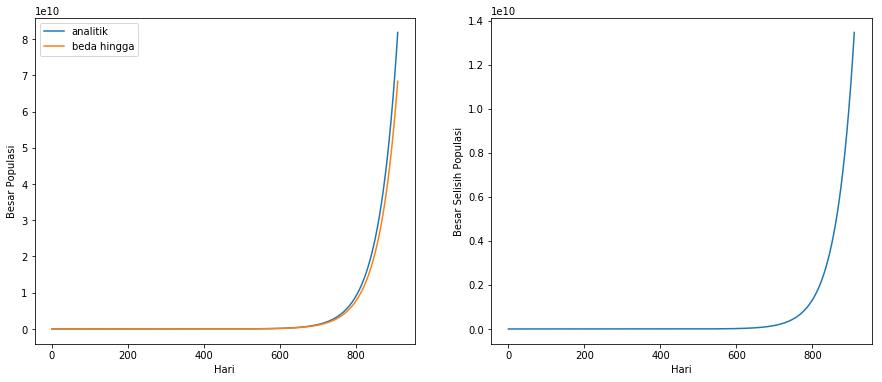

In [3]:
# inisialisasi variabel
LamaSimulasi= 2.5    # dalam tahun
PopulasiA    = [1000] # Analitik
PopulasiB    = [1000] # Beda hingga
RasioTumbuh  = 0.02
dt           = 1/365
waktu        = range(1,int(LamaSimulasi/dt)+1)
# selisih perhitungan analitik dan beda hingga
# ini bakal menarik
SelisihAB    = []     

# menghitung besar populasi baru setiap iterasi, dan
# menambahkannya ke array populasi yang sudah ada
for iterasi in waktu[:-1]:
    # secara analitik
    PopulasiA.append(PopulasiA[0] * exp(RasioTumbuh*iterasi))

    # secara beda hingga
    PopulasiB.append(PopulasiB[iterasi-1] * (1 + RasioTumbuh))

    # hitung selisih
    SelisihAB.append( PopulasiA[iterasi] - PopulasiB[iterasi] )

#plotting
plt.rcParams['figure.figsize'] = [15, 6]

plt.subplot(1,2,1)
plt.plot(PopulasiA,label='analitik')
plt.plot(PopulasiB,label='beda hingga')
plt.xlabel('Hari')
plt.ylabel('Besar Populasi')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Hari')
plt.ylabel('Besar Selisih Populasi')
plt.plot(SelisihAB)

plt.show()

{kalimat fiosofis yang meyakinkan pembaca hal ini konsekuensi yang wajar akibat aproksimasi, dan bisa ditekan dengan metode yang lebih baik}

### Model Logistik

Model Malthus tidak mempertimbangkan kapasitas lingkungan, seperti luas daerah dan makanan yang tersedia. Hal ini dapat diperbaiki dengan mempertimbangkan anggota populasi yang meninggal. Anggap banyaknya populasi yang meninggal sebagai $D$, dan kapasitas lingkungan sebagai $M$. Dengan asumsi banyak kematian populasi sebanding dengan pertumbuhan populasi, maka dapat ditulis

$$\frac{dD}{dt} = \Big(r\frac{P}{M}\Big)P$$

mensubtitusi persamaan ini ke model Malthus, didapatkan

$$\frac{dP}{dt} = rP - \Big(r\frac{P}{M}\Big)P
\\= rP\Big(1-\frac{P}{M}\Big)$$

lewat metode dekomposisi variabel solusi analitik persamaan ini adalah:

$$ P_t = \frac{MP_0 e^{rt}}{M + P_0(e^{rt}-1)}$$

wow, itu sulit dan sepertinya salah. Namun, persamaan beda hingganya masih masuk akal

$$P_t = P_{t-\Delta t} + rP_{t-\Delta t}\Big(1-\frac{1}{M}P_{t-\Delta t}\Big)$$

mari lakukan hal yg sama ke model logistik ini:

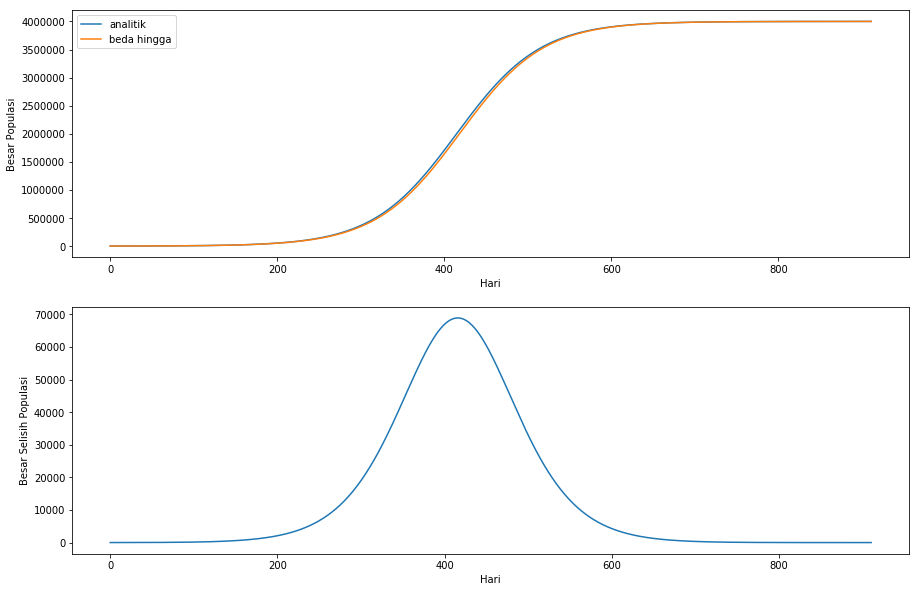

In [4]:
# inisialisasi variabel
LamaSimulasi = 2.5    # dalam tahun
PopulasiA    = [1000] # Analitik
PopulasiB    = [1000] # Beda hingga
RasioTumbuh  = 0.02
Kapasitas    = 4e6
dt           = 1/365
waktu        = range(1,int(LamaSimulasi/dt)+1)

SelisihAB    = []     

# menghitung besar populasi baru setiap iterasi, dan
# menambahkannya ke array populasi yang sudah ada
for iterasi in waktu[:-1]:
    # secara analitik
    P0ert = PopulasiA[0]*exp(RasioTumbuh*iterasi)
    PopulasiA.append( (Kapasitas * P0ert)/(Kapasitas - PopulasiA[0] + P0ert) )

    # secara beda hingga
    PopulasiB.append( PopulasiB[iterasi-1]*(1 + RasioTumbuh*(1-PopulasiB[iterasi-1]/Kapasitas)))

    # hitung selisih
    SelisihAB.append( PopulasiA[iterasi] - PopulasiB[iterasi] )

#plotting
plt.rcParams['figure.figsize'] = [15, 10]

plt.subplot(2,1,1)
plt.plot(PopulasiA,label='analitik')
plt.plot(PopulasiB,label='beda hingga')
plt.xlabel('Hari')
plt.ylabel('Besar Populasi')
plt.legend()

plt.subplot(2,1,2)
plt.xlabel('Hari')
plt.ylabel('Besar Selisih Populasi')
plt.plot(SelisihAB)

plt.show()

wow, seorang harus mengapresiasi hal ini!
### Ekuibrilium dan Stabilitas

# Studi Kasus
{kasus pertumbuhan dan peluruhan yang lain}

## Hukum Pemanasan-Pendinginan Newton
{cot intro}


## 1854 Broad Street Cholera Outbreak
* https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak wow!
* https://www.theguardian.com/news/datablog/2013/mar/15/john-snow-cholera-map

bagaimana model dimana laju kasus kematian sebanding dengan akar kuadrat dari kasus?

## Model Investasi
Develop a model for an investment that has approximately a continuous growth rate of 9.3%.

## Membeli Mobil
A young professional would like to save enough money to pay cash for a new car. Develop a model to determine when such a purchase will be possible. Take into account the following issues: The price of a new car is rising due to inflation. The buyer plans to trade in a car, which is depreciating. This person already has some savings and plans to make regular monthly payments. Thus, use a ∆t value of 1 mo. Assume appropriate rates and values.

## Serangan Jangkrik
Develop a model for the mallard population in Exercise 3. Have a converter or variable for the number of acres of rice available for mallard consumption, and from this value, have the model compute the carrying capacity. Report on the effect of decreasing the number of acres of rice available (Reinecke).

## Kapasitas Lingkungan Bersifat Dinamik
In some situations, the carrying capacity itself is dynamic. For example, the performance of airplanes had one carrying capacity with piston engines and a higher limit with the advent of jet engines. Many think that human population growth over a limited period of time follows such a pattern as technological changes enable more people to live on the available resources. In such cases, we might be able to model the carrying capacity itself as a logistic. Suppose $M_1$ is the first carrying capacity, and $M_1 + M_2$ is the second. The differential equation for the carrying capacity $M(t)$ as a function of time $t$ would be as follows:

M ( t ) − M 1 
dM ( t )
= a ( M ( t ) − M 1 )  1 −
  for some constant a > 0
dt
M 2


By using M(t), we have a logistic for the carrying capacity as well as a logistic for the population. Figure 2.3.3 displays population, P(t), in black and M(t) in c“‘“r with the irst carrying ca”acity M 1 = 20; the second,
M 1 + M 2 = 70; and an inlecti“n ”“int f“r M at t = 450. Notice that we get a “bilogistic,” or “doubly logistic,” model for P(t). Develop a model for the following scenario. 

### Inggris Raya
First, generate an appropriate logistic carrying capacity, M(t). Then, use this dynamic carrying capacity to limit the population. In a ”“”u‘ati“n study “f Eng‘and fr“’ 1541 t“ 1975, starting with a ”“”u- lation of about 1 million, early islanders appear to have a carrying capacity of around 5 million people. However, beginning about 1800 with the advent of the Industrial Revolution, the carrying capacity appears to have increased to about 50 million people. The change in the concavity from concave up to concave down for this new logistic appears to occur in about 1850 (Meyer and Ausube‘ 1999).

### Jepang
Refer to Project 3 for a description of a logistic carrying-capacity function. Using that information, develop a model for the Japanese population from the year 1100 to 2000. With an initial population of 5 million, the island population was mainly a feudal society that leveled off to about 35 million. The industrial revolution came to Japan in the latter part of the nineteenth century, and the ”“”u‘ati“n r“se ra”id‘y “ver a 77-yr ”eri“d, with the inlec- ti“n ”“int “ccurring ab“ut 1908 (Meyer and Ausube‘ 1999).

## Populasi Ikan di Kolam
Develop a model for the number of trout in a lake initially stocked with 400 tr“ut. These ish increase at a rate “f 15%, and the ‘a—e has a carrying capacity of 5000 trout. However, vacationers catch trout at a rate of 8%.

## Perburuan Paus
It has been esti’ated that f“r the Antarctic in wha‘e, r = 0.08, M = 400,000, and P 0 = 70,000 in 1976. M“de‘ this ”“”u‘ati“n. Then, revise the ’“de‘ t“ consider harvesting the whales as a percentage of rM. Give various values
for this percentage that lead to extinction and other values that lead to increases in the population. Estimate the maximum sustainable yield, or the percentage of rM that gives a constant population in the long term (Zill
2013).